preprocessing : 전처리
  - 누락,잘못된 데이터를 처리하는 방법 및 찾는 방법
  - 머신러닝 모델에서 훈련데이터를 입력하기 전에 실시
  - 데이터 시각화를 통해 실제 데이터를 정리
  - 머신러닝의 기초 수식
    - y = f(x)
      - x는 훈련데이터와 테스트데이터, 두개 모두 같은 feature여야 함

 - 데이터의 품질문제
  - 데이터 분포의 지나친 차이
    - 연속형 데이터인데 최대값과 최소값의 차이가 너무 많은경우
    - 스케일이 다른경우
      - 최대와 최소값을 0과 1사이의 값으로 바꾸거나 표준 정규분포형태로 변환

 - 결측치(NA)
  - 데이터가 없음
    - 제거한거나.또는 적당한 값으로 채움

- 이상치
  - 극단적으로 크거나 작은값
  - 단순한 데이터 분포차이가 아님
  - 데이터 오기입이나 특이현상

1. 결측치 처리하기
  - 데이터를 삭제하거나 채움
    - 해당 열이나 행을 삭제
    - 평균값,최빈갑,중앙값등으로 채움

In [ ]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df


,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df.isnull().sum()  #  결측치의 개수

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [ ]:
df.isnull().mean()  # 결측치의 비율

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

결측치 제거
  - dropna()
    - na가 있는 모든 행을 없음

In [ ]:
df.dropna()  # 결과만... df는 변동 없음

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
# 반영
# df = df.dropna()
# df.dropna(inplace=True)

In [ ]:
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df.dropna(how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df.dropna(how='any')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
df.dropna(axis=1,how='all')  # 컬럼을 기준으로 na가 하나라도 있으면 삭제한다.  how='any' 기본

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
#  모든 값이 na로 되어 있는 row, col을 삭제하시오
temp = df.dropna(how='all')
temp = temp.dropna(how='all', axis=1)
temp

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


na가 포함된 개수로 삭제
  - threshfh
    - 1 이면 데이터가 한개라도 존재하는 행은 남김 --> 전부 na이면 삭제
    - 5 이면 데이터가 다섯개 이상 있어야 남김

In [ ]:
df.dropna(thresh=1)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
df.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
# 공공기관에서 데이터 하나 받아서 결측치 유무 확인하기

In [ ]:
path = '/content/경찰청_범죄 발생 지역별 통계_20151231.csv'
df2 = pd.read_csv(path,encoding='cp949')
df2.isnull().sum() > 0
# df2

범죄대분류     False
범죄중분류     False
서울        False
부산        False
대구        False
          ...  
경남 통영     False
제주 서귀포    False
제주 제주     False
기타도시      False
도시이외      False
Length: 90, dtype: bool

채우기
  - fill
    - 데이터의 분포를 고려해서 채움

In [2]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df.rename(columns={'sex':'gender'},inplace=True)
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [4]:
df.fillna(0)

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,0,0,0.0,0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [10]:
print('평균값:',df['preTestScore'].mean())
df['preTestScore'].fillna( df['preTestScore'].mean(), inplace=True  )

평균값: 3.0


열별 분포를 고려하여 채울수 있음
  - groupby 함수로 각 인덱스의 성별에 딸 빈칸을 채움

In [18]:
df.groupby('gender')['postTestScore'].mean()

gender
f    70.0
m    43.5
Name: postTestScore, dtype: float64

In [19]:
df.groupby('gender')['postTestScore'].transform('mean')

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [21]:
df['postTestScore'].fillna(
  df.groupby('gender')['postTestScore'].transform('mean')
  , inplace=True
)

In [22]:
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [23]:
df.dropna(inplace=True)

In [24]:
df

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,3.0,70.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


범주형 데이터 처리하기 : 원핫인코딩  one-hot-encoding
  - 범주형 데이터의 개수 만큼 가변수(dummy variable)를 생성하여 존재 유무를 1 또는 0으로 표현
  - color라는 feature,colum의 값이 {geeen,blue,yello}

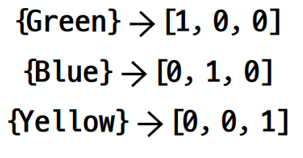

In [25]:
# 원핫은
# 판다스에서 제공하는 get_dummies함수
# 사이킷런 scikit-learn  제공하는 LabelEncoder / oneHotEncoder사용

In [26]:
edges = pd.DataFrame({'source': [0, 1, 2],
                      'target': [2, 2, 3],
                      'weight': [3, 4, 5],
                      'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [28]:
#수치형(연속형) 문자형(범주형) 데이터 확인
edges.dtypes

source     int64
target     int64
weight     int64
color     object
dtype: object

In [29]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [30]:
pd.get_dummies(edges["color"])  # 시리즈

,blue,red
0,0,1
1,1,0
2,1,0


In [31]:
pd.get_dummies(edges[["color"]])  # 데이터 프레임

,color_blue,color_red
0,0,1
1,1,0
2,1,0


숫자지만 범주형형태의 데이터(기수형 데이터)
  - 빈도수를 구해보면 안다...

In [36]:
# weight는 원래 M L XL 이렇게 범주형으로 변경한다.
# 원핫을 적용

In [39]:
edges['weight'].value_counts()

3    1
4    1
5    1
Name: weight, dtype: int64

In [40]:
weight_dict = { 3:'M', 4:'L', 5:'XL' }
edges['weight_sign'] = edges['weight'].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [42]:
weight_sign =  pd.get_dummies(edges['weight_sign'])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [43]:
pd.concat( [ edges,  weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


In [44]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df


,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


연속형 데이터를 범주형 데이터로 변환 - 히스토그램
  - 바인딩
  - 그룹으로 나눠서 각 그룹에 이름을 붙인다.

In [47]:
# import seaborn as sns
# sns.histplot(data = df, x='postTestScore')

In [50]:
# 데이터의 범위 0~25 25 ~50 50 ~75 75 ~100
# 함수 cut 사용
bins = [0,25,50,75,100]
group_names = ['low','okay','good','great']
categories = pd.cut( df['postTestScore'],bins,labels= group_names )
categories

0       low
1     great
2      good
3      good
4      good
5       low
6     great
7      good
8      good
9      good
10     good
11     good
Name: postTestScore, dtype: category
Categories (4, object): ['low' < 'okay' < 'good' < 'great']

In [51]:
df['postTestScore_category'] = categories
df

,regiment,company,name,preTestScore,postTestScore,postTestScore_category
0,Nighthawks,1st,Miller,4,25,low
1,Nighthawks,1st,Jacobson,24,94,great
2,Nighthawks,2nd,Ali,31,57,good
3,Nighthawks,2nd,Milner,2,62,good
4,Dragoons,1st,Cooze,3,70,good
5,Dragoons,1st,Jacon,4,25,low
6,Dragoons,2nd,Ryaner,24,94,great
7,Dragoons,2nd,Sone,31,57,good
8,Scouts,1st,Sloan,2,62,good
9,Scouts,1st,Piger,3,70,good


데이터의 크기 맞추기 : 피쳐 스케일링
   - 스케일링 : 데이터 간 범위를 맞춤
    - 몸무게와 키를 하나의 모델에 넣으면 데이터의 범위가 훨씬 넓어져 키가 몸무게에 비해 모델에 과다하게 영향을 줌

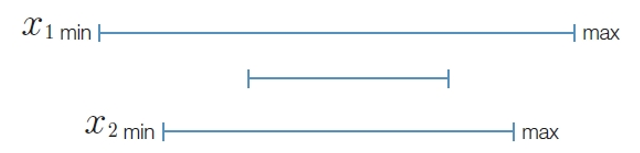

x1과 x2의 변수 범위가 다를때 하나의 변수 범위로 통일



---------------------------------------------------------------



최소값-최대값 정규화(min-max normalization)
  - 최소값과 최대값을 기준으로 0에서 1 또는 0에서 지정값까지로 값의 크기를 변경

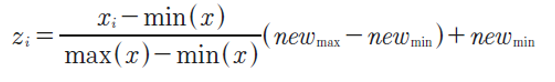

-----------------------------------

z-스코어 정규화(z-score normalization)
  - 기존의 값을 표준 정규분포값으로 변환

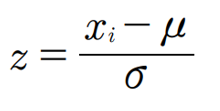

값 - 평균 / 표준편차

In [52]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68],
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [54]:
df['A'].mean()

76.526

In [55]:
(df['A'] - df['A'].mean()) / ( df['A'].max() - df['A'].min()  )

0   -0.760010
1    0.166209
2    0.175325
3    0.239990
4    0.178485
Name: A, dtype: float64

B에대한 Z-score

In [56]:
# (x - mean()) / std()
(df['B'] - df['B'].mean()) / df['B'].std()

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64